In [24]:
import numpy as np
import scipy.integrate as si
import scipy.interpolate as ip
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.optimize import root
from scipy.interpolate import barycentric_interpolate

# Problem 1

In [21]:
# Define alpha and c functions
c = lambda x: -(7/10)*(x**2 - 1)
alpha = lambda x: (1 - c(x)**2)**(-0.5)

# Create function that goes inside functional
def L(x, y, y_prime):
    return alpha(x) * np.sqrt(1 + (alpha(x)*y_prime(x))**2) - alpha(x)**2 * c(x) * y_prime(x)

# Define the functonal J(y)
def T(y, y_prime):
    return si.quad(lambda x :L(x, y, y_prime), -1, 1)

# Problem 2

In [22]:
# Minimum time bound is a straight line
y = lambda x: (5/2)*x + (5/2)
y_prime = lambda x: (5/2)

print("Upper bound on minimum time time required to cross:", T(y, y_prime)[0])

# Min value of secant from -1 to 1 is 1
y = lambda x: 1

print("Lower bound on minimum time time required to cross:", si.quad(y, -1, 1)[0])

Upper bound on minimum time time required to cross: 3.8770820491384126
Lower bound on minimum time time required to cross: 2.0


# Problem 3

In [23]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

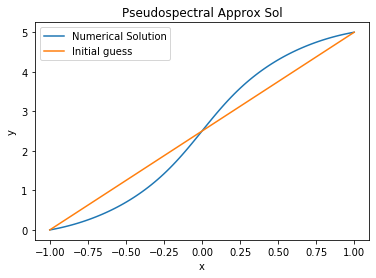

In [69]:
N = 20
# Adjust d/dx matrix to force U[0] = 0 U[N] = 1
D, x = cheb(N)

def func(U):
    out = D @ (alpha(x)**3 * (D @ U) * (1 + (alpha(x) * (D @ U))**2)**(-0.5) - alpha(x)**2 * c(x))
    out[0] = U[0] - 5
    out[-1] = U[-1]
    return out

# Use scipy root function to approx solution, interpolate more points
guess = np.ones(len(x))
u_approx = root(func, guess).x
temp = u_approx
domain = np.linspace(-1, 1, 100)
u_approx = barycentric_interpolate(x, u_approx, domain)

# Plot the solution
plt.plot(domain, u_approx, label="Numerical Solution")
plt.plot(domain, y(domain), label="Initial guess")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Pseudospectral Approx Sol")
plt.show()

# Problem 4

Text(0.5, 1.0, 'The optimal angle to steer the boat')

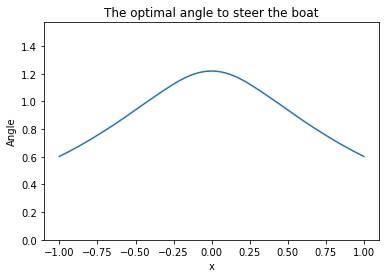

In [73]:
N = 20
# Adjust d/dx matrix to force U[0] = 0 U[N] = 1
D, x = cheb(N)
func = lambda theta: D @ temp - np.tan(theta) - c(x) * (1/np.cos(theta))

# Use root find to find the values of theta that satisfy (18.1)
angles = root(func, np.ones(len(x))).x

# Interpolate to smooth out
domain = np.linspace(-1, 1, 100)
angles = barycentric_interpolate(x, angles, domain)

# Plot angles from solution
plt.plot(domain, angles)
plt.ylim(0, np.pi/2)
plt.ylabel("Angle")
plt.xlabel("x")
plt.title("The optimal angle to steer the boat")